In [1]:
#importing the libraries
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from torch.utils.data import DataLoader

#import module
from dataset import LungImageDataset, CXRImageDataset

/home/trucloan/anaconda3/envs/myenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#tao duong dan den data
datapath = '/mnt/DATA/covid19_resnet152_python-main/archive_14gb/COVIDxCXR3/'
train_path = datapath + 'train/'
test_path = datapath + 'test/'

In [3]:
#doc file metadata
train_metadata = datapath + 'train.txt'
test_metadata = datapath + 'test.txt'
train_txt= pd.read_csv(train_metadata, sep=" ", header=None)
test_txt = pd.read_csv(test_metadata, sep=" ", header=None)

In [4]:
#gan ten cot
train_txt.columns= ["patient id","file_name","class","source"]
train_txt.head()

,patient id,file_name,class,source
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


In [5]:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
train_txt['label'] = np.where(train_txt['class']== 'negative', 0, 1) #tao cot label theo dk cua class
train_txt

,patient id,file_name,class,source,label
0,5,ARDSSevere.png,negative,cohen,0
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen,0
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen,0
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen,0
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen,0
...,...,...,...,...,...
29981,55204bb8-89fc-449d-8563-e91654abea9d,55204bb8-89fc-449d-8563-e91654abea9d.png,negative,rsna,0
29982,0f4b80b6-fd39-451f-aebf-7cdb1b655c0b,0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.png,negative,rsna,0
29983,5fb64e85-62ef-4852-8ad1-f799015c8cc3,5fb64e85-62ef-4852-8ad1-f799015c8cc3.png,negative,rsna,0
29984,c57ad4fd-3aa8-4ae8-a262-7336360d8265,c57ad4fd-3aa8-4ae8-a262-7336360d8265.png,negative,rsna,0


In [6]:
#chi lay cot filename va label (1,4)
train_txt1 = train_txt.iloc[:,[1,4]]
train_txt1

,file_name,label
0,ARDSSevere.png,0
1,acute-respiratory-distress-syndrome-ards-1.jpg,0
2,acute-respiratory-distress-syndrome-ards.jpg,0
3,ards-secondary-to-tiger-snake-bite.png,0
4,pneumocystis-pneumonia-2-PA.png,0
...,...,...
29981,55204bb8-89fc-449d-8563-e91654abea9d.png,0
29982,0f4b80b6-fd39-451f-aebf-7cdb1b655c0b.png,0
29983,5fb64e85-62ef-4852-8ad1-f799015c8cc3.png,0
29984,c57ad4fd-3aa8-4ae8-a262-7336360d8265.png,0


In [7]:
#gan ten cot tren file test
test_txt.columns= ["patient id","file_name","class","source"]
test_txt.head()

,patient id,file_name,class,source
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord


In [8]:
test_txt['label'] = np.where(test_txt['class']== 'negative', 0, 1) #tao cot label theo dk cua class
test_txt

,patient id,file_name,class,source,label
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord,1
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord,1
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord,1
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord,1
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord,1
...,...,...,...,...,...
395,a77b32f6-1999-4cc6-8a0d-1ef7e53850f0,a77b32f6-1999-4cc6-8a0d-1ef7e53850f0.png,negative,rsna,0
396,41bf2042-53a2-44a8-9a29-55e643af5ac0,41bf2042-53a2-44a8-9a29-55e643af5ac0.png,negative,rsna,0
397,ec09ddb3-9b0b-4749-9e0d-f94a4a7e5fed,ec09ddb3-9b0b-4749-9e0d-f94a4a7e5fed.png,negative,rsna,0
398,abff4044-3c0a-458f-b0c7-04254be7fc0c,abff4044-3c0a-458f-b0c7-04254be7fc0c.png,negative,rsna,0


In [9]:
#chi lay cot filename va label (1,4)
test_txt1 = test_txt.iloc[:,[1,4]]
test_txt1

,file_name,label
0,MIDRC-RICORD-1C-419639-003251-46647-0.png,1
1,MIDRC-RICORD-1C-419639-001464-39871-0.png,1
2,MIDRC-RICORD-1C-419639-000918-78965-0.png,1
3,MIDRC-RICORD-1C-419639-003318-64285-0.png,1
4,MIDRC-RICORD-1C-419639-001015-81591-0.png,1
...,...,...
395,a77b32f6-1999-4cc6-8a0d-1ef7e53850f0.png,0
396,41bf2042-53a2-44a8-9a29-55e643af5ac0.png,0
397,ec09ddb3-9b0b-4749-9e0d-f94a4a7e5fed.png,0
398,abff4044-3c0a-458f-b0c7-04254be7fc0c.png,0


In [10]:
test_txt1.to_csv(datapath + 't.csv',index=False) 

In [11]:
with open(datapath + 'test_set.txt', 'w') as f:
    f.write(
        test_txt1.to_string(header = False, index = False)
    )
f.close()

In [12]:
train_set,val_set=train_test_split(train_txt1,test_size=0.2, random_state = 42, shuffle=True)

In [13]:
train_set

,file_name,label
17557,A264703-01-02-1901-NA-CHEST_AP_PORT-66725-2.00...,1
618,12941_2020_358_Fig1_HTML.jpg,1
17084,A073761-01-12-1901-NA-CHEST_AP_PORTABLE-71927-...,1
22586,A071880-12-31-1900-NA-CHEST_AP_PORT-70474-4.00...,1
26947,A485373-01-05-1901-NA-CHEST_AP_PORT-97503-4.00...,1
...,...,...
29802,46480de3-b915-4868-bd15-1e2c728b540b.png,0
5390,7462adfa-a0fc-4489-8d58-89f1d012c26a.png,0
860,COVID(151).png,1
15795,1ffee791-10f6-4b8f-bfcd-35220e8e0003.png,0


In [14]:
with open(datapath + 'train_set.txt', 'w') as f:
    f.write(
        train_set.to_string(header = False, index = False)
    )
f.close()

In [15]:
val_set

,file_name,label
26351,A504821-01-04-1901-NA-CHEST_AP_VIEWONLY-43696-...,1
7568,af387f75-2b11-4210-8ca5-aeae34b354c5.png,0
21818,A492240-01-09-1901-NA-CHEST_AP_PORTABLE-64102-...,1
5199,6de2cc0e-1591-4974-9bed-9cb29727753b.png,0
21871,A134763-01-01-1901-NA-CHEST_AP_PORT-30237-1.00...,1
...,...,...
23627,A969170-12-31-1900-NA-CHEST_AP_VIEWONLY-23879-...,1
11405,383d8991-e27b-4f43-bab1-e1f492ace0f5.png,0
29157,A030428-01-03-1901-NA-CHEST_AP_PORT-06922-1.00...,1
18757,A370011-01-24-1901-NA-CHEST_AP_VIEWONLY-84157-...,1


In [16]:
with open(datapath + 'val_set.txt', 'w') as f:
    f.write(
        val_set.to_string(header = True, index = False)
    )
f.close()

In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23988 entries, 17557 to 23654
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  23988 non-null  object
 1   label      23988 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 562.2+ KB


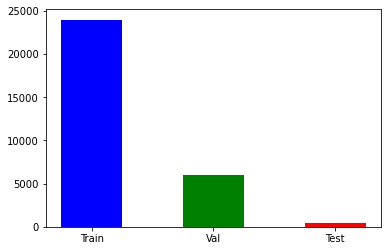

In [18]:
# ve phan bo data tren train, val, test
# https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt

len_train , len_val, len_test = len(train_set), len(val_set), len(test_txt)

# print(len_train , len_val, len_test)
x = ['Train', 'Val', 'Test']
y = [len_train, len_val, len_test]
plt.bar(x, y, color = ['b', 'g', 'r'], width=0.5)
# plt.legend()
plt.show()

In [19]:
lst_train = list(train_set['label'].value_counts())
lst_val = list(val_set['label'].value_counts())
lst_test = list(test_txt1['label'].value_counts())
lst_test

[200, 200]

In [20]:
def visualize_distribute_dataset(lst_train, lst_val, lst_test):
    y = [lst_train, lst_val, lst_test]
    # set width of bar
    barWidth = 0.25


    data = np.array(y).T.tolist()

    X = np.arange(3)
    fig = plt.figure()
    ax = fig.add_axes([0,0, 1,2])

    covid = ax.bar(X + 0.00, data[0], color = 'r', width = 0.25, label = 'Positive')

    normal = ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, label = 'Negative')

    # Adding Xticks
    plt.xlabel('Dataset', fontweight ='bold', fontsize = 15)
    plt.ylabel('Total images', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(X))],
            ['Train', 'Val', 'Test'])

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(covid)
    autolabel(normal)
    plt.title('Distribution of data sources')
    plt.legend()

    # saving the file.Make sure you 
    # use savefig() before show()
    plt.savefig('/mnt/DATA/covid19_resnet152_python-main/archive_14gb/script/classification/visualize/DistributeDataset.png', bbox_inches='tight')
    plt.show()

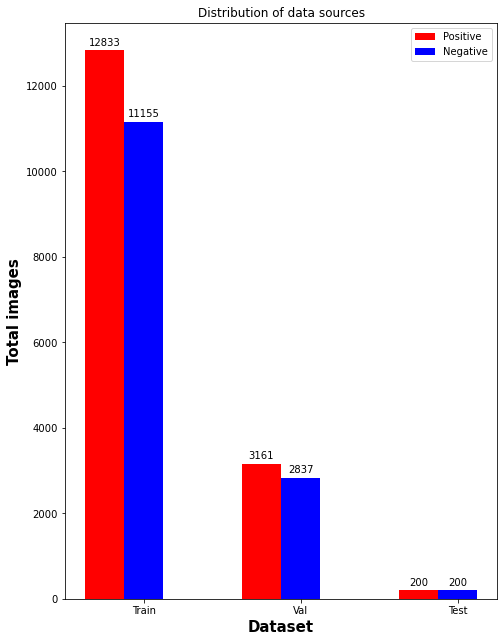

In [21]:
visualize_distribute_dataset(lst_train, lst_val, lst_test)

In [22]:
import torchvision.transforms as transforms
def augment():
    data_transforms = {
        'train' : transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((256, 256)),
            transforms.RandomAffine(degrees = 0, shear = 0.2),    
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406],  std = np.array([0.229, 0.224, 0.225])),
        ]),
        'val' : transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((256,256)),
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406],  std = np.array([0.229, 0.224, 0.225]))
        ]),
        'test' : transforms.Compose([
            transforms.Resize((256,256)),
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406],  std = np.array([0.229, 0.224, 0.225]))
        ])
    }
    return data_transforms

In [23]:
def imshow_img_mask(img, mask, res1, maskthres, res, targets, name):
    """ Imshow for Tensor"""
    plt.figure(figsize = (30,10))
    for idx in range(2):   
           
        newlabel = ['Negative' if lb == 0 else 'Positive' for lb in targets]

        plt.subplot(2,10, 1+idx*10)
        plt.imshow(img[idx], cmap='gray')   

        plt.subplot(2,10, 2+idx*10)
        plt.imshow(mask[idx], cmap='gray')

        plt.subplot(2,10, 3+idx*10)
        plt.imshow(res1[idx], cmap='gray')
        plt.title(name[idx] + ' ('+ newlabel[idx] + ')')

        plt.subplot(2,10, 4+idx*10)
        plt.imshow(maskthres[idx], cmap= 'gray')            

        plt.subplot(2,10,5+idx*10)
        plt.imshow(res[idx])

        plt.subplot(2,10,6+idx*10)
        plt.imshow(img[idx +1], cmap='gray')
              

        plt.subplot(2,10, 7+idx*10)
        plt.imshow(mask[idx +1], cmap='gray')  

        plt.subplot(2,10, 8+idx*10)
        plt.imshow(res1[idx + 1], cmap='gray')
        plt.title(name[idx+1]  +' (' + newlabel[idx+1] + ')')        

        plt.subplot(2,10, 9+idx*10)
        plt.imshow(maskthres[idx+1], cmap='gray')
        # plt.title(newlabel[idx+2])

        plt.subplot(2,10, 8+idx*10)
        plt.imshow(res[idx+1])

    plt.savefig('/mnt/DATA/covid19_resnet152_python-main/archive_14gb/script/classification/visualize/train_dataloader.png')

    plt.show()


In [24]:
def img_de_normalize (img, mask):
        
    img = np.squeeze(img)
    img = img*0.2220 + 0.5128
    mask = mask*0.220+0.5128
    img= np.clip(img, 0, 1)
    mask = np.clip(mask, 0,1)
    
    return img, mask

In [25]:
train_txt11= pd.read_csv('/mnt/DATA/covid19_resnet152_python-main/archive_14gb/COVIDxCXR3/train_set.txt', sep= '\s+', header=None)
train_txt11.columns = ['file_name', 'label']
train_txt11

,file_name,label
0,A264703-01-02-1901-NA-CHEST_AP_PORT-66725-2.00...,1
1,12941_2020_358_Fig1_HTML.jpg,1
2,A073761-01-12-1901-NA-CHEST_AP_PORTABLE-71927-...,1
3,A071880-12-31-1900-NA-CHEST_AP_PORT-70474-4.00...,1
4,A485373-01-05-1901-NA-CHEST_AP_PORT-97503-4.00...,1
...,...,...
23983,46480de3-b915-4868-bd15-1e2c728b540b.png,0
23984,7462adfa-a0fc-4489-8d58-89f1d012c26a.png,0
23985,COVID(151).png,1
23986,1ffee791-10f6-4b8f-bfcd-35220e8e0003.png,0


In [26]:
# import torch
# train_dataset = LungImageDataset(train_txt11, '/mnt/DATA/covid19_resnet152_python-main/archive_14gb/COVIDxCXR3/train/', '/mnt/DATA/covid19_resnet152_python-main/archive_14gb/script/segment/visualize/FPN_DenseNet121/lung_mask/EDA_Train')
# train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle=True)
# image, mask, maskthres, res, targets, name = next(iter(train_dataloader))
# res1 = torch.transpose(res,1,3)
# # imshow_img_mask(image, mask, maskthres, res1, targets, name)

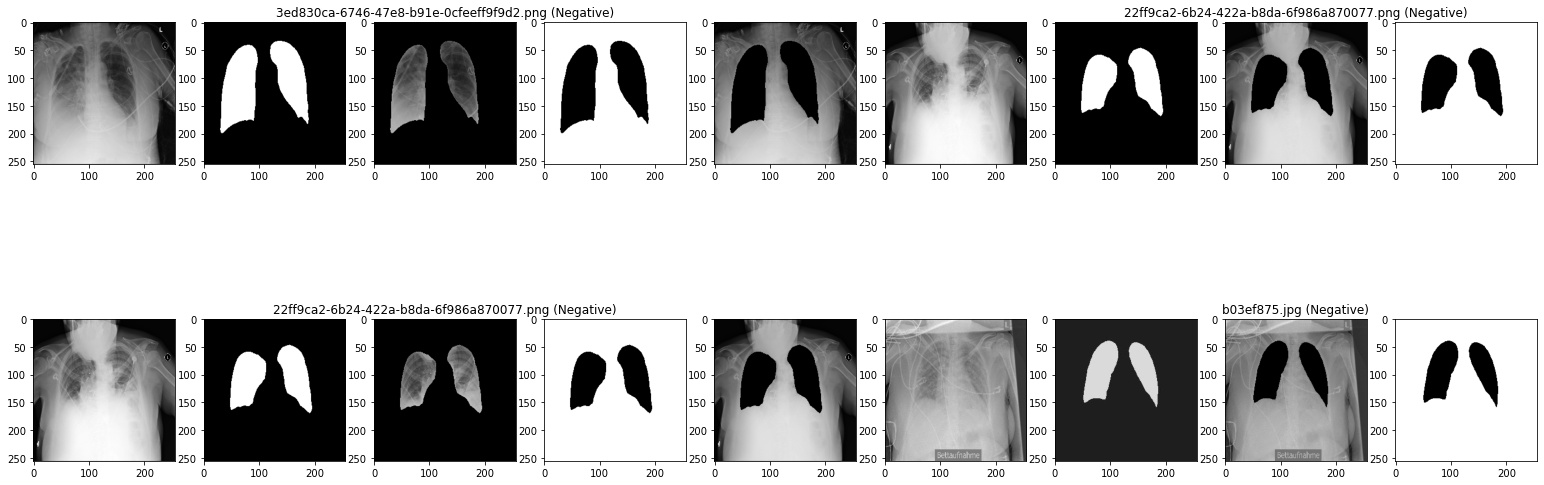

In [27]:
train_dataset = CXRImageDataset(train_txt11, '/mnt/DATA/covid19_resnet152_python-main/archive_14gb/COVIDxCXR3/train/', '/mnt/DATA/covid19_resnet152_python-main/archive_14gb/script/segment/visualize/FPN_DenseNet121/lung_mask/EDA_Train')
train_dataloader = DataLoader(train_dataset, batch_size = 8, shuffle=True)
image, mask, maskinv, res1, res, targets, name = next(iter(train_dataloader))
res1 = torch.transpose(res1,1,3)
res = torch.transpose(res,1,3)  
imshow_img_mask(image, mask, res1, maskinv, res, targets, name)